# Part 3: Machine learning

## Classification to predict the price

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, mean_squared_error, r2_score 
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [2]:
df=pd.read_excel("webscraping.xlsx")
df.head()

,Name,Type,City,Adults,Children,Latitude,Longitude
0,Abbaye de Maredsous et Le Saint-Joseph,Abbeys and religious monuments,Denée,0.0,0.0,47.378864,-0.607726
1,Abbaye d'Aulne,Abbeys and religious monuments,Gozée,5.0,1.0,50.333228,4.351559
2,Hôpital Notre-Dame à la Rose,Abbeys and religious monuments,Lessines,13.0,8.0,50.712304,3.830113
3,Musée de la Vie wallonne,Abbeys and religious monuments,Liège,7.0,5.0,50.645094,5.573611
4,Trésor de la Collégiale Ste-Waudru,Abbeys and religious monuments,Mons,4.0,2.0,50.454957,3.951958


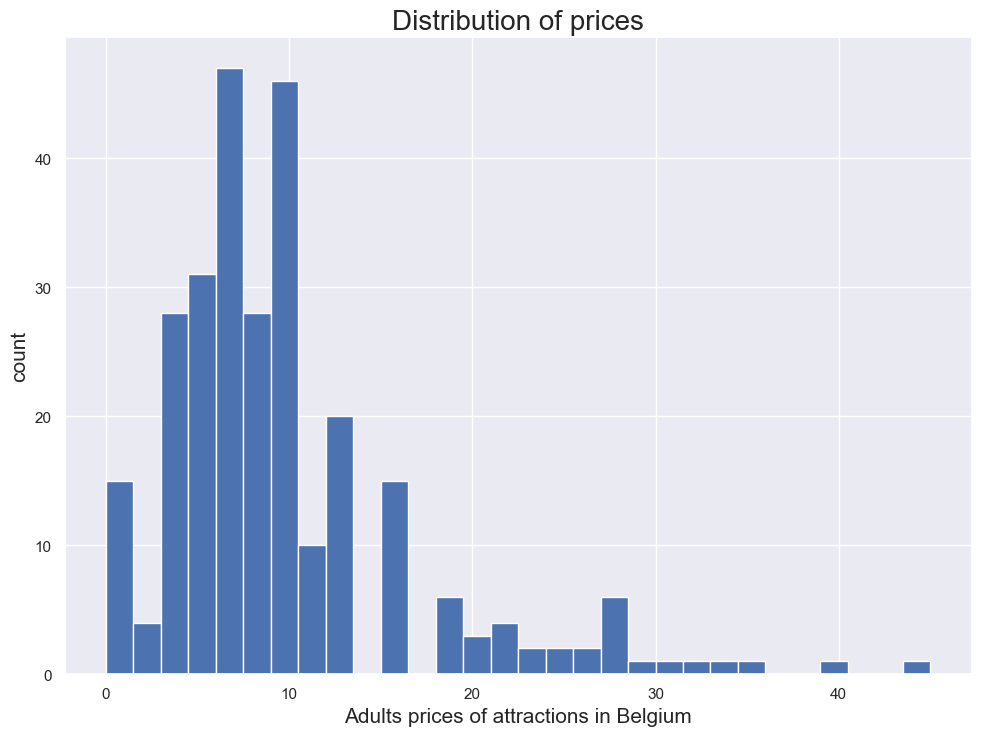

In [4]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
plt.hist(df['Adults'], bins=30)
plt.xlabel("Adults prices of attractions in Belgium", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of prices', size=20)
plt.show()

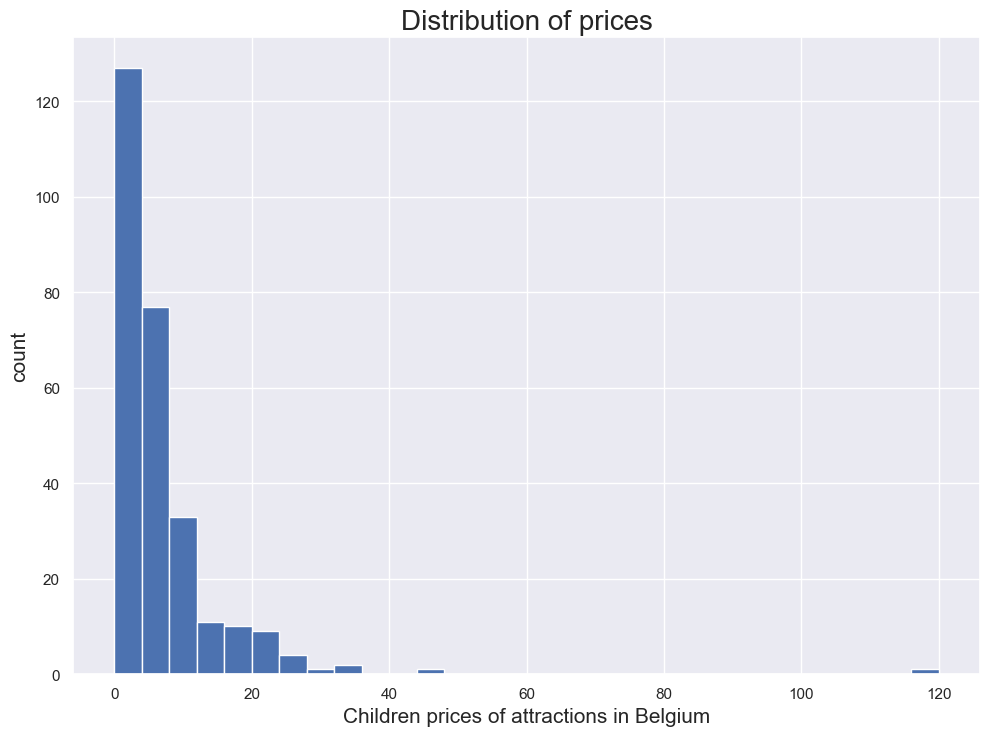

In [5]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
plt.hist(df['Children'], bins=30)
plt.xlabel("Children prices of attractions in Belgium", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of prices', size=20)
plt.show()

In [6]:
X = df[['City','Type']]
y = df['Adults']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
combined = pd.concat([X_train, X_test], axis=0)

In [9]:
categorical_cols = ['City','Type']

In [10]:
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

In [11]:
combined = preprocessor.fit_transform(combined).toarray()

In [12]:
X_train = combined[:len(X_train)]
X_test = combined[len(X_train):]

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.78383023446716e+27


Predictions of the price of adults by linear regressions

In [15]:
X = df[['Type', 'City']]
y = df['Adults']

In [16]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [20]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("R-squared:", r2)

Train RMSE: 2.5273226910641196
Test RMSE: 6.561270274340995
R-squared: 0.47075772192075693


In [23]:
new_data = [['Art', 'Bruxelles']]
new_data = ct.transform(new_data)

# Predict the price for children
predicted_price = model.predict(new_data)
print("Predicted Price for Adults:", predicted_price)

Predicted Price for Adults: [9.77710087]


C:\Users\flori\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [25]:
import itertools
unique_types = df['Type'].unique()
unique_cities = df['City'].unique()
combinations = list(itertools.product(unique_types, unique_cities))
predict_df_adults = pd.DataFrame(combinations, columns=['Type', 'City'])
predict_data = ct.transform(predict_df_adults)
predicted_prices = model.predict(predict_data)
predict_df_adults['Predicted Adults Prices'] = predicted_prices

predict_df_adults = predict_df_adults[['City', 'Type', 'Predicted Adults Prices']]

print(predict_df_adults)

               City                            Type  Predicted Adults Prices
0             Denée  Abbeys and religious monuments                -0.026493
1            Gozée   Abbeys and religious monuments                 5.000009
2          Lessines  Abbeys and religious monuments                12.887541
3             Liège  Abbeys and religious monuments                 5.114064
4              Mons  Abbeys and religious monuments                 6.077846
...             ...                             ...                      ...
2723  Vieux-Genappe                          UNESCO                 2.015858
2724       Waterloo                          UNESCO                 7.015858
2725           Coo                           UNESCO                 7.787703
2726       Dochamps                          UNESCO                -3.075816
2727     Houffalize                          UNESCO                 0.424185

[2728 rows x 3 columns]


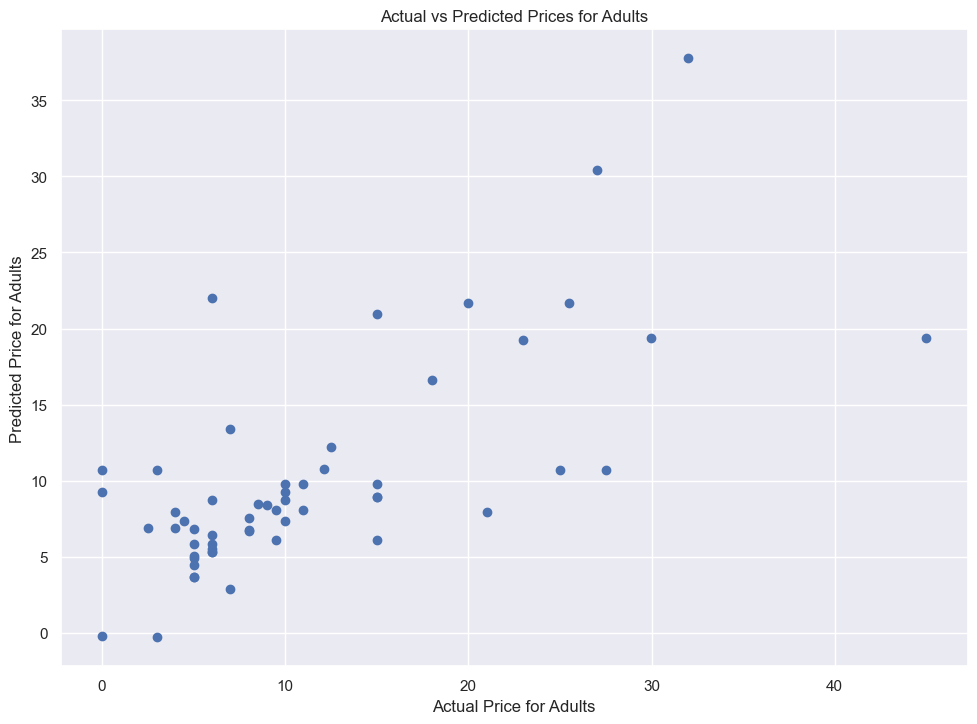

In [26]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Price for Adults')
plt.ylabel('Predicted Price for Adults')
plt.title('Actual vs Predicted Prices for Adults')
plt.show()

## Predictions of the price of children by linear regressions

In [27]:
X = df[['Type', 'City']]
y = df['Children']

In [28]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [29]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [31]:
new_data = [['Abbeys and religious monuments', 'Charleroi']]  # Provide the type and city values for prediction
new_data = ct.transform(new_data)
predicted_price = model.predict(new_data)
print("Predicted Price for Children:", predicted_price)

Predicted Price for Children: [1.26301157]


C:\Users\flori\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [32]:
unique_types = df['Type'].unique()
unique_cities = df['City'].unique()
combinations = list(itertools.product(unique_types, unique_cities))
predict_df_children = pd.DataFrame(combinations, columns=['Type', 'City'])
predict_data = ct.transform(predict_df_children)
predicted_prices = model.predict(predict_data)
predict_df_children['Predicted Prices for Children'] = predicted_prices

predict_df_children = predict_df_children[['City', 'Type', 'Predicted Prices for Children']]

print(predict_df_children)

               City                            Type  \
0             Denée  Abbeys and religious monuments   
1            Gozée   Abbeys and religious monuments   
2          Lessines  Abbeys and religious monuments   
3             Liège  Abbeys and religious monuments   
4              Mons  Abbeys and religious monuments   
...             ...                             ...   
2723  Vieux-Genappe                          UNESCO   
2724       Waterloo                          UNESCO   
2725           Coo                           UNESCO   
2726       Dochamps                          UNESCO   
2727     Houffalize                          UNESCO   

      Predicted Prices for Children  
0                          0.016049  
1                          1.000050  
2                          7.968664  
3                          4.412203  
4                          2.928613  
...                             ...  
2723                       0.790036  
2724                       5.790037

In [34]:
predict_df = predict_df_adults.merge(predict_df_children, on=['Type', 'City'])
predict_df.sort_values(by='City', inplace=True)
print(predict_df)

                 City                                            Type  \
1709  Alle-sur-Semois  Industrial heritage and engineering structures   
97    Alle-sur-Semois                  Abbeys and religious monuments   
469   Alle-sur-Semois                                     Archaeology   
1089  Alle-sur-Semois                    Draisines and tourist trains   
717   Alle-sur-Semois                 Automotive and railway heritage   
...               ...                                             ...   
2640           Wéris                                           UNESCO   
1896           Wéris                                   Local products   
36             Wéris                   Abbeys and religious monuments   
2392           Wéris                        Theme and amusement parks   
1400           Wéris                         Handicrafts and know-how   

      Predicted Adults Prices  Predicted Prices for Children  
1709                 7.381474                       3.133361

In [35]:
predict_df

,City,Type,Predicted Adults Prices,Predicted Prices for Children
1709,Alle-sur-Semois,Industrial heritage and engineering structures,7.381474,3.133361
97,Alle-sur-Semois,Abbeys and religious monuments,6.035976,3.858642
469,Alle-sur-Semois,Archaeology,6.092410,6.219688
1089,Alle-sur-Semois,Draisines and tourist trains,12.418774,6.041468
717,Alle-sur-Semois,Automotive and railway heritage,8.942047,4.574186
...,...,...,...,...
2640,Wéris,UNESCO,4.695331,-0.686817
1896,Wéris,Local products,2.996635,-0.393090
36,Wéris,Abbeys and religious monuments,2.943604,-0.361066
2392,Wéris,Theme and amusement parks,16.271063,12.984440


In [36]:
df2=predict_df

In [37]:
df2.to_excel('predict_df.xlsx', index=False)

essai d'autres trucs

In [206]:
X = df[['Type', 'City']]
y = df['Adults']

In [207]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [210]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [211]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("R-squared:", r2)

Train RMSE: 3.30544401289321
Test RMSE: 6.124317819075606
R-squared: -0.19660597974856953
